K Nearest Neighbors Model
We will be working will pet adoption center from Austin dataset.
We have joined 2 csv files with intakes and outcomes into 1 reviews.csv file and we will load that and work on it step by step.

1. Read the Dataset

In [4]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('review_dataset.csv')
print('The shape of the dataset is: ', df.shape)

The shape of the dataset is:  (95485, 13)


2.Explanatory Data Analysis -
    We will look at the columns, rows and some simple statistics of the dataset.

In [5]:
df.head()

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days
0,A794011,1.0,Neutered Male,Chunk,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,730,730
1,A776359,1.0,Neutered Male,Gizmo,7201 Levander Loop in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,White/Brown,365,365
2,A674754,0.0,Intact Male,NaN,12034 Research in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,6,6
3,A689724,1.0,Neutered Male,*Donatello,2300 Waterway Bnd in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black,60,60
4,A680969,1.0,Neutered Male,*Zeus,4701 Staggerbrush Rd in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,White/Orange Tabby,7,60


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95485 entries, 0 to 95484
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pet ID                 95485 non-null  object 
 1   Outcome Type           95485 non-null  float64
 2   Sex upon Outcome       95484 non-null  object 
 3   Name                   59138 non-null  object 
 4   Found Location         95485 non-null  object 
 5   Intake Type            95485 non-null  object 
 6   Intake Condition       95485 non-null  object 
 7   Pet Type               95485 non-null  object 
 8   Sex upon Intake        95484 non-null  object 
 9   Breed                  95485 non-null  object 
 10  Color                  95485 non-null  object 
 11  Age upon Intake Days   95485 non-null  int64  
 12  Age upon Outcome Days  95485 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 10.2+ MB


In [7]:
df.describe()

,Outcome Type,Age upon Intake Days,Age upon Outcome Days
count,95485.000000,95485.000000,95485.000000
mean,0.564005,703.436959,717.757313
std,0.495889,1052.252197,1055.023160
min,0.000000,0.000000,0.000000
25%,0.000000,30.000000,60.000000
50%,1.000000,365.000000,365.000000
75%,1.000000,730.000000,730.000000
max,1.000000,9125.000000,9125.000000


Let's seperate model features and model target

In [8]:
df.columns

Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')

In [10]:
model_features = df.columns.drop('Outcome Type')
model_target = 'Outcome Type'
print(model_features)
print(model_target)

Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color',
       'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')
Outcome Type


We can explore the features as categorical and numerical 

In [11]:
import numpy as np

numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
categorical_features_all = df[model_features].select_dtypes(include='object').columns
print(numerical_features_all)
print(categorical_features_all)

Index(['Age upon Intake Days', 'Age upon Outcome Days'], dtype='object')
Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color'],
      dtype='object')


Target Distribution - Lets check our Target Distribution

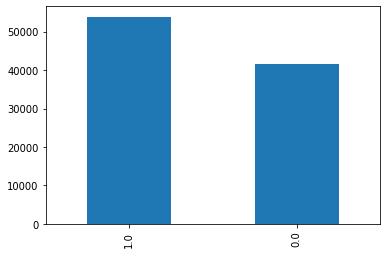

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

df[model_target].value_counts().plot.bar()
plt.show()

We need to understand that handling class imbalance is highly required, as the model performance can be greatly impacted. In particular the model may not work well for the infrequent classes, as there are not enough samples to learn patterns from,
and so it would be hard for the classifier to identify and match those patterns.
We might want to downsample the dominant classor upsample the rare class, to help with learning patterns. However we should only fix the imbalance in the training set, without changing the validation and test sets, as these should follow the original distribution. We will perform this task after train/test split.


3. Select features to build the model

We only consider the numerical features to build the model for this first sample solution.

Let's examine the numerical features.

Age upon Intake Days


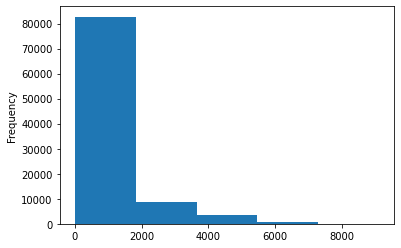

Age upon Outcome Days


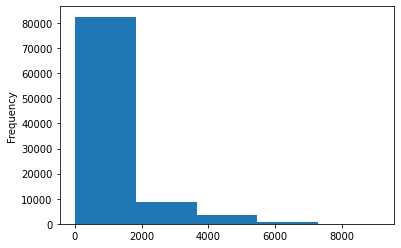

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=5)
    plt.show()

if for some histograms the values are heavily placed in the first bin, it is good to check for outliers either checking the min-max values of those particular features and/on explore value ranges.

In [15]:
for c in numerical_features_all:
    print(c)
    print('min: ', df[c].min(), 'max: ', df[c].max())

Age upon Intake Days
min:  0 max:  9125
Age upon Outcome Days
min:  0 max:  9125


With value_counts() function, we can increase the number of histogram bins to 10 for more bins for a more refined view of the numerical features.

In [16]:
for c in numerical_features_all:
    print(c)
    print(df[c].value_counts(bins=10, sort=False))

Age upon Intake Days
(-9.126, 912.5]     74835
(912.5, 1825.0]     10647
(1825.0, 2737.5]     3471
(2737.5, 3650.0]     3998
(3650.0, 4562.5]     1234
(4562.5, 5475.0]     1031
(5475.0, 6387.5]      183
(6387.5, 7300.0]       79
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Intake Days, dtype: int64
Age upon Outcome Days
(-9.126, 912.5]     74642
(912.5, 1825.0]     10699
(1825.0, 2737.5]     3465
(2737.5, 3650.0]     4080
(3650.0, 4562.5]     1263
(4562.5, 5475.0]     1061
(5475.0, 6387.5]      187
(6387.5, 7300.0]       81
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Outcome Days, dtype: int64


Lets check missing values for these numerical features.

In [17]:
print(df[numerical_features_all].isna().sum())

Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64


If any missing values, we can apply a quick fix by applying mean imputation.This will replace the missing values with the mean value of the corresponding column.

Note: The statistically correct way to perform mean/mode imputation before training an ML model is to compute the column-wise means on the training data only, and then use these values to impute missing data in both the train and test sets. So we will need to split our dataset first.

Training and Test datsets

In [20]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, 
                                         test_size=0.1, 
                                         shuffle=True, 
                                         random_state=23)
print('Training set shape:', train_data.shape)
print('Class 0 samples in the training set: ', 
      sum(train_data[model_target]==0))
print('Class 1 samples in the training set: ',
     sum(train_data[model_target]==1))
print()
print('Testing set shape: ', test_data.shape)
print('Class 0 samples in the test set: ',
     sum(test_data[model_target]==0))
print('Class 1 samples in the test set: ',
     sum(test_data[model_target]==1))

Training set shape: (85936, 13)
Class 0 samples in the training set:  37499
Class 1 samples in the training set:  48437

Testing set shape:  (9549, 13)
Class 0 samples in the test set:  4132
Class 1 samples in the test set:  5417


Important Note : We want to fix the imbalance only in training set. We shouldn't change the validation and test sets, as these should follow the original distribution

This is after downsampling the outcome type 1's

In [26]:
from sklearn.utils import shuffle

class_0_no = train_data[train_data[model_target]==0]
class_1_no = train_data[train_data[model_target]==1]

unsampled_class_1_no = class_1_no.sample(n=len(class_0_no),
                                        replace=True,
                                        random_state=23)
train_data = pd.concat([class_0_no, unsampled_class_1_no])
train_data = shuffle(train_data)
print('Training set shape: ', train_data.shape)
print('Class 0 samples in the training set: ',
     sum(train_data[model_target]==0))
print('Class 1 samples in the training set: ',
     sum(train_data[model_target]==1))

Training set shape:  (96874, 13)
Class 0 samples in the training set:  48437
Class 1 samples in the training set:  48437


5. Data Processing with Pipeline

In a typical machine learning workflow we will need to apply data transformations, like imputation and scaling as done above, at least twice. FIrst on the training set with .fit() and .transform(), when preparing the data to training the model. And again on any new data we want to predict on with .transform(). Scikit-learn pipeline is a tool that simplifies this process by enforcing the implementation and order of data processing steps.

We will build a pipeline to impute the missing values with the mean usking sklearns SimpleImputer, scale the numerical features to have similar orders of magnitude by bringing them into the 0-1 range with either skleanr's MinMaxScaler or StandardScaler and finally train an estimator KNeighborsClassifier on the imputed and scaled dataset.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

##Pipeline##

"""
Pipeline desired data transformers, along with an estimator at
the end. For each step specify, a name, the actual transformer/
estimator with its parameters
"""
classifier = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('estimator', KNeighborsClassifier(n_neighbors=3))
])
# Visualize the pipeline
# THis will come in handy especially when building more complex
# pipelines, stringing together multiple preprocessing steps

from sklearn import set_config
set_config(display='diagram')
classifier

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])

6. Train a Classifier

We will train our classifier with .fit() on our training dataset.

In [29]:
# Get train data to train the classifier

X_train = train_data[numerical_features_all]
y_train = train_data[model_target]

# Fit the classifier to training data
# Train data going through the Pipeline it's first imputed,
# then scaled and finally used to fit the estimator

classifier.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])

7. Test the classifier

Let's evaluate the performance of the trained classifier. We will use .predict() this time. 
Lets first see how the model works on the training dataset.

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, classification_report

train_predictions = classifier.predict(X_train)

print('Model Performance on the train set: ')
print('Confusion Matrix: ', confusion_matrix(y_train, train_predictions))
print('Classification Report: ', classification_report(y_train, train_predictions))
print('Training accuracy: ', accuracy_score(y_train, train_predictions))


Model Performance on the train set: 
Confusion Matrix:  [[21676 26761]
 [12292 36145]]
Classification Report:                precision    recall  f1-score   support

         0.0       0.64      0.45      0.53     48437
         1.0       0.57      0.75      0.65     48437

    accuracy                           0.60     96874
   macro avg       0.61      0.60      0.59     96874
weighted avg       0.61      0.60      0.59     96874

Training accuracy:  0.5968680967029337


Similarly we can do all this on the test set as well

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

X_test = test_data[numerical_features_all]
y_test = test_data[model_target]

test_predictions = classifier.predict(X_test)

print('Model performance on the test set: ')
print('Confusion matrix:', confusion_matrix(y_test, test_predictions))
print('Testing accuracy:', accuracy_score(y_test, test_predictions))


Model performance on the test set: 
Confusion matrix: [[1917 2215]
 [1444 3973]]
Testing accuracy: 0.6168185150277516
